In [57]:
# from https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython
import warnings
warnings.filterwarnings('ignore')

In [58]:
# https://keras.io/datasets/#mnist-database-of-handwritten-digits
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

2 tuples:
* **x_train, x_test:** uint8 array of grayscale image data with shape (num_samples, 28, 28).
* **y_train, y_test:** uint8 array of digit labels (integers in range 0-9) with shape (num_samples,)

'Label: 5'

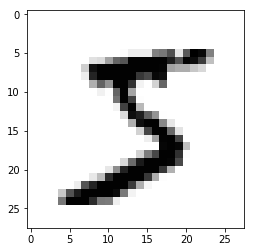

In [59]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow([255 - i for i in x_train[0]], cmap='gray')
"Label: {}".format(y_train[0])

In [60]:
import keras
import numpy as np

x_train = np.reshape(x_train, (60000, 784))
x_test = np.reshape(x_test, (10000, 784))

# https://keras.io/getting-started/sequential-model-guide/
y_train_cat = keras.utils.to_categorical(y_train, num_classes=10, dtype="uint8")
y_test_cat = keras.utils.to_categorical(y_test, num_classes=10, dtype="uint8")

print(y_train[0])
y_train_cat[0]

5


array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=uint8)

In [61]:
from keras import Sequential
from keras import layers

# Dense (500, linear)
# Dense (100, linear)
# Dense (10, softmax)
# [0.6122526635818183, 0.8727999925613403]
model = Sequential()
model.add(layers.Dense(500, activation='linear', input_dim=784))
model.add(layers.Dense(100, activation='linear'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [62]:
model.fit(x_train, y_train_cat, epochs=10, batch_size=32)

Epoch 1/10
60000/60000 [==============================] - 7s 116us/step - loss: 24.0589 - accuracy: 0.8131
Epoch 2/10
60000/60000 [==============================] - 7s 115us/step - loss: 3.7496 - accuracy: 0.8347
Epoch 3/10
60000/60000 [==============================] - 7s 117us/step - loss: 1.5476 - accuracy: 0.8323
Epoch 4/10
60000/60000 [==============================] - 7s 114us/step - loss: 1.0340 - accuracy: 0.8414
Epoch 5/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.8142 - accuracy: 0.8483
Epoch 6/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.7527 - accuracy: 0.8532
Epoch 7/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.7334 - accuracy: 0.8562
Epoch 8/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.7110 - accuracy: 0.8594
Epoch 9/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.7133 - accuracy: 0.8594
Epoch 10/10
60000/60000 [====================

In [63]:
scores = model.evaluate(x_test, y_test_cat)
scores

10000/10000 [==============================] - 0s 42us/step


[0.6122526635818183, 0.8727999925613403]